In [3]:
import os
import pandas as pd

def read_text_file(base_folder, timestamp, file_name):
    """
    Reads a text file from a specified timestamp folder using pandas, 
    handling mixed delimiters (commas and whitespace) properly, 
    and dynamically naming columns.
    """
    folder_path = os.path.join(base_folder, timestamp)
    file_path = os.path.join(folder_path, file_name)
    
    if not os.path.exists(file_path):
        print(f"Error: The file '{file_name}' does not exist in the folder '{folder_path}'.")
        return None

    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(',')
            processed_parts = parts[:2] + parts[2].split()
            data.append(processed_parts)

    df = pd.DataFrame(data)

    num_columns = df.shape[1]
    
    # Define the first two column names
    column_names = ["Span", "Beam"]
    
    # If there's at least 3 columns, assign "Co-ordinate" to the third column
    if num_columns > 2:
        column_names.append("Co-ordinate")
    
    remaining_columns = [f"Column_{i+1}" for i in range(num_columns - len(column_names))]

    df.columns = column_names + remaining_columns

    return df

# Enter time stemp and loop name
base_folder = '../0_GAB'  
timestamp = '20141129040000'  # Time stamp
file = 'N-B_Mid1_Comp.txt'  # Name of loop
df = read_text_file(base_folder, timestamp, file)

print(df)


    Span Beam Co-ordinate Column_1 Column_2 Column_3 Column_4 Column_5
0     N5    B        5.52      -27        1        0     -7.1   505.52
1     N5    B        5.41      -32        0        0     -7.1   505.41
2     N5    B        5.31      -27        1        0     -7.1   505.31
3     N5    B        5.21      -26        0        0     -7.0   505.21
4     N5    B        5.11      -23        0        0     -7.0   505.11
..   ...  ...         ...      ...      ...      ...      ...      ...
845   N0    B        0.94      -66        0        0     -4.9     0.94
846   N0    B        0.84      -68        1        0     -4.8     0.84
847   N0    B        0.73      -62        0        0     -4.6     0.73
848   N0    B        0.63      -55        0        0     -4.3     0.63
849   N0    B        0.53      -53        1        0     -4.1     0.53

[850 rows x 8 columns]


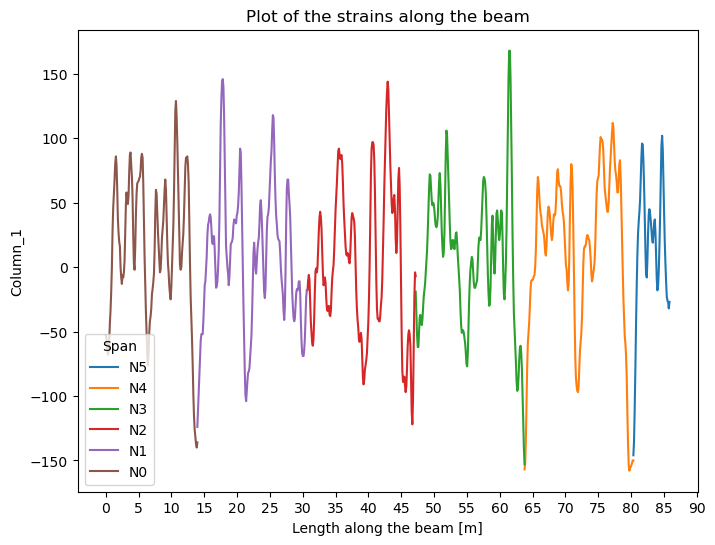

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df["Co-ordinate"] = pd.to_numeric(df["Co-ordinate"], errors="coerce")
df["Column_1"] = pd.to_numeric(df["Column_1"], errors="coerce")

# Define which columns to use for plotting, check the excel for what column
y_col = "Column_1"   # Y-axis 

x_col = "Co-ordinate" 
df["Adjusted_Coordinate"] = df[x_col]  

df["Span_Number"] = df["Span"].str.extract(r'(\d+)').astype(float)
span_order = df.groupby("Span")["Span_Number"].first().sort_values().index.tolist()

offset = 0

for span in span_order:
    span_mask = df["Span"] == span
    if span_mask.any():
        min_coord = df.loc[span_mask, x_col].min()  
        df.loc[span_mask, "Adjusted_Coordinate"] += offset - min_coord
        offset = df.loc[span_mask, "Adjusted_Coordinate"].max()  

plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="Adjusted_Coordinate", y=y_col, hue="Span", linestyle="-") #add markers: marker="o",

plt.xlabel('Length along the beam [m]')  
plt.ylabel(y_col)  
tick_spacing = 5  # Adjust this value to control the frequency of ticks
x_min, x_max = df["Adjusted_Coordinate"].min(), df["Adjusted_Coordinate"].max()
plt.xticks(np.arange(x_min, x_max + tick_spacing, tick_spacing)) 
plt.yticks()  
plt.title('Plot of the strains along the beam')
plt.show()



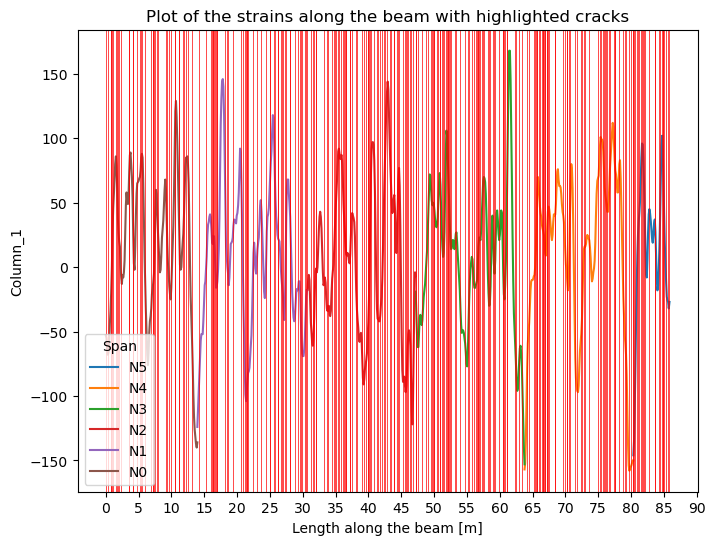

In [ ]:
# Ensure Co-ordinate and Column_1 are numeric
df["Co-ordinate"] = pd.to_numeric(df["Co-ordinate"], errors="coerce")
df["Column_1"] = pd.to_numeric(df["Column_1"], errors="coerce")
df["Column_2"] = pd.to_numeric(df["Column_2"], errors="coerce")

# Define y column for plotting
y_col = "Column_1"  


x_col = "Co-ordinate"  
df["Adjusted_Coordinate"] = df[x_col]  

df["Span_Number"] = df["Span"].str.extract(r'(\d+)').astype(float)
span_order = df.groupby("Span")["Span_Number"].first().sort_values().index.tolist()

offset = 0

for span in span_order:
    span_mask = df["Span"] == span
    if span_mask.any():
        min_coord = df.loc[span_mask, x_col].min()  
        df.loc[span_mask, "Adjusted_Coordinate"] += offset - min_coord
        offset = df.loc[span_mask, "Adjusted_Coordinate"].max()  

plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="Adjusted_Coordinate", y=y_col, hue="Span", linestyle="-")

highlight_df = df[df["Column_2"] == 1]
for xc in highlight_df["Adjusted_Coordinate"]:
    plt.axvline(x=xc, color="red", linestyle="-", linewidth=0.5) # red line were a crack is measured

plt.xlabel('Length along the beam [m]')  
plt.ylabel(y_col)  
tick_spacing = 5  # Change for x-tick frequency
x_min, x_max = df["Adjusted_Coordinate"].min(), df["Adjusted_Coordinate"].max()
plt.xticks(np.arange(x_min, x_max + tick_spacing, tick_spacing)) 
plt.yticks()  
plt.title('Plot of the strains along the beam with highlighted cracks')
plt.show()

